In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
train_dir = 'E:\Kuliah\Semester 5\Big Data Analytics\Coba Detect\Eksperiment\dataset'


In [12]:
# Tentukan generator data untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel gambar
    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    width_shift_range=0.2,  # Geser gambar secara horizontal sebesar 20% lebar gambar
    height_shift_range=0.2,  # Geser gambar secara vertikal sebesar 20% tinggi gambar
    shear_range=0.2,  # Melakukan shear transformation sebesar 20%
    zoom_range=0.2,  # Melakukan zoom gambar sebesar 20%
    horizontal_flip=True,  # Membalikkan gambar secara horizontal
    fill_mode='nearest'  # Mengisi piksel yang kosong dengan piksel terdekat
)

In [13]:
# Membuat generator data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Menyesuaikan ukuran gambar menjadi 150x150 piksel
    batch_size=32,  # Jumlah gambar yang digunakan dalam setiap iterasi pelatihan
    class_mode='categorical'  # Mode kelas untuk tugas klasifikasi multikelas
)

Found 1192 images belonging to 3 classes.


In [14]:
# Membangun model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Menggunakan dropout untuk mengurangi overfitting
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Menggunakan softmax untuk output tiga kelas
])


In [15]:
# Mengompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [16]:
# Melatih model
model.fit(
    train_generator,
    steps_per_epoch=100,  
    epochs=10  
)

Epoch 1/10
 38/100 [==========>...................] - ETA: 1:50 - loss: 0.8583 - accuracy: 0.6862WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.


100/100 [==============================] - 70s 669ms/step - loss: 0.8583 - accuracy: 0.6862


In [17]:
# Tentukan path ke gambar yang akan diuji
test_image_path = 'E:\\Kuliah\\Semester 5\\Big Data Analytics\\Coba Detect\\Eksperiment\\test\\tes1.jpg'

In [18]:
# Load gambar dan ubah ukurannya menjadi 150x150 piksel
test_image = image.load_img(test_image_path, target_size=(150, 150))

In [19]:
# Ubah gambar menjadi array numerik
test_image_array = image.img_to_array(test_image)

In [20]:
# Normalisasi nilai piksel gambar
test_image_array = test_image_array / 255.0

In [21]:
# Ubah dimensi gambar menjadi batch dengan dimensi tambahan
test_image_array = np.expand_dims(test_image_array, axis=0)


In [22]:
# Melakukan prediksi menggunakan model
predictions = model.predict(test_image_array)


1/1 [==============================] - 0s 220ms/step


In [23]:
# Mengambil indeks kelas dengan probabilitas tertinggi
predicted_class_index = np.argmax(predictions)


In [24]:
# Mengurutkan label kelas
class_labels = ['car', 'motorcycle', 'bicycle']

In [25]:
# Mendapatkan label kelas yang diprediksi
predicted_class_label = class_labels[predicted_class_index]

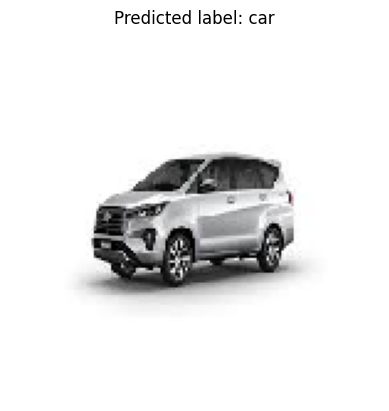

In [26]:
# Menampilkan gambar test
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted label: ' + predicted_class_label)
plt.show()

In [27]:
# # Melatih model
# model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=10
# )

# # Simpan model ke file
# model.save('model.h5')